In [3]:
# Reload modules automatically
%load_ext autoreload
%autoreload 2

In [4]:
"""
Created a little library that contains the necessary auxilary functions.
We will put general functions there and work on the tests and plots here.

"""

import cnub

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

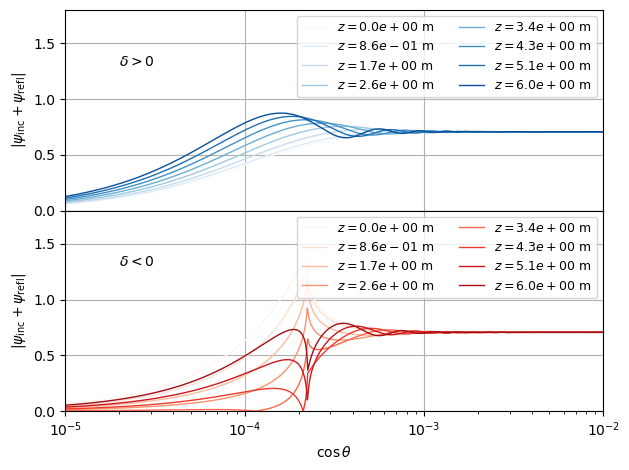

In [5]:
fig = plt.figure()
# Eventually we want to set rcparams here to use LaTeX fonts.

ax_1 = fig.add_subplot(211)
ax_2 = fig.add_subplot(212)
Npoints = 8
for i, z in enumerate(np.linspace(0, 6, Npoints)):
    z_eV = cnub.tools.m_to_eVinv(z)

    costheta = np.geomspace(1e-5, 1e-2, 1000)
    
    abs_inc_plus_reflected = np.abs(cnub.tools.psi_incident(x=0, z=z_eV, ctheta = costheta) + cnub.tools.psi_reflected(x=0, z=z_eV, ctheta = costheta, delta=2.5e-8))
    ax_1.plot(costheta, abs_inc_plus_reflected, label=fr"$z = {z:.1e}$ m", color = cm.Blues(i/Npoints), lw=1)

    abs_inc_plus_reflected = np.abs(cnub.tools.psi_incident(x=0, z=z_eV, ctheta = costheta) + cnub.tools.psi_reflected(x=0, z=z_eV, ctheta = costheta, delta=-2.5e-8))
    ax_2.plot(costheta, abs_inc_plus_reflected, label=fr"$z = {z:.1e}$ m", color = cm.Reds(i/Npoints), lw=1)

ax_1.text(2e-5, 1.3, r"$\delta > 0$")
ax_2.text(2e-5, 1.3, r"$\delta < 0$")

for ax in [ax_1, ax_2]:
    ax.grid(True)
    ax.legend(loc='best', ncol=2, fontsize=9)
    ax.set_xscale('log')
    ax.set_ylabel(r'$|\psi_{\rm inc}+\psi_{\rm refl}|$')
    ax.set_xlabel(r'$\cos \theta$')
    ax.set_ylim(0,1.8)
    ax.set_xlim(1e-5,1e-2)
ax_1.set_xticklabels([])

fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/psi_inc_plus_reflected_in_costheta.pdf", dpi=400)

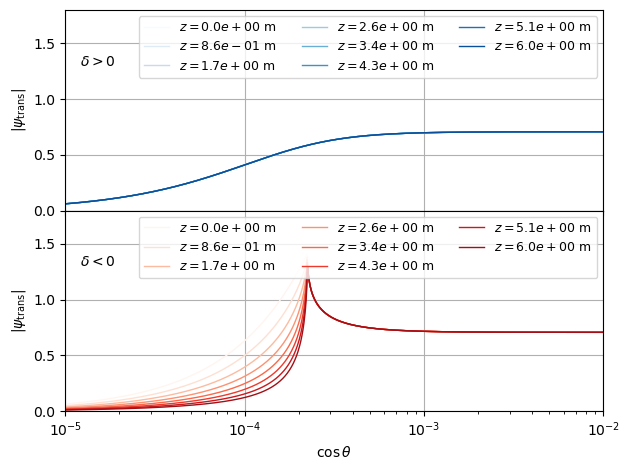

In [6]:
fig = plt.figure()
# Eventually we want to set rcparams here to use LaTeX fonts.

ax_1 = fig.add_subplot(211)
ax_2 = fig.add_subplot(212)
Npoints = 8
for i, z in enumerate(np.linspace(0, 6, Npoints)):
    z_eV = cnub.tools.m_to_eVinv(z)

    costheta = np.geomspace(1e-5, 1e-2, 1000)
    
    abs_trans = np.abs(cnub.tools.psi_transmitted(x=0, z=z_eV, ctheta = costheta, delta=2.5e-8))
    ax_1.plot(costheta, abs_trans, label=fr"$z = {z:.1e}$ m", color = cm.Blues(i/Npoints), lw=1)

    abs_trans = np.abs(cnub.tools.psi_transmitted(x=0, z=z_eV, ctheta = costheta, delta=-2.5e-8))
    ax_2.plot(costheta, abs_trans, label=fr"$z = {z:.1e}$ m", color = cm.Reds(i/Npoints), lw=1)

ax_1.text(1.2e-5, 1.3, r"$\delta > 0$")
ax_2.text(1.2e-5, 1.3, r"$\delta < 0$")

for ax in [ax_1, ax_2]:
    ax.grid(True)
    ax.legend(loc='best', ncol=3, fontsize=9)
    ax.set_xscale('log')
    ax.set_ylabel(r'$|\psi_{\rm trans}|$')
    ax.set_xlabel(r'$\cos \theta$')
    ax.set_ylim(0,1.8)
    ax.set_xlim(1e-5,1e-2)
ax_1.set_xticklabels([])

fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/psi_trans_in_costheta.pdf", dpi=400)

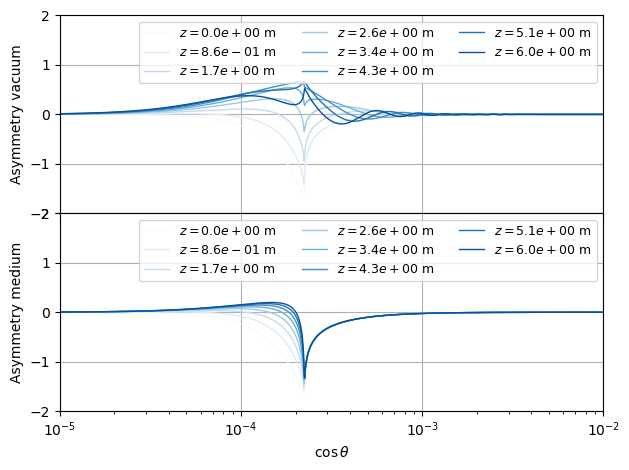

In [7]:
fig = plt.figure()
# Eventually we want to set rcparams here to use LaTeX fonts.

ax_1 = fig.add_subplot(211)
ax_2 = fig.add_subplot(212)
Npoints = 8
for i, z in enumerate(np.linspace(0, 6, Npoints)):
    z_eV = cnub.tools.m_to_eVinv(z)

    costheta = np.geomspace(1e-5, 1e-2, 1000)
    
    abs_inc_plus_reflected_plus = np.abs(cnub.tools.psi_incident(x=0, z=z_eV, ctheta = costheta) + cnub.tools.psi_reflected(x=0, z=z_eV, ctheta = costheta, delta=2.5e-8))
    abs_inc_plus_reflected_minus = np.abs(cnub.tools.psi_incident(x=0, z=z_eV, ctheta = costheta) + cnub.tools.psi_reflected(x=0, z=z_eV, ctheta = costheta, delta=-2.5e-8))
    ax_1.plot(costheta, abs_inc_plus_reflected_plus**2 - abs_inc_plus_reflected_minus**2, label=fr"$z = {z:.1e}$ m", color = cm.Blues(i/Npoints), lw=1)

    abs_inc_plus_reflected_plus = np.abs(cnub.tools.psi_transmitted(x=0, z=z_eV, ctheta = costheta, delta=2.5e-8))
    abs_inc_plus_reflected_minus = np.abs(cnub.tools.psi_transmitted(x=0, z=z_eV, ctheta = costheta, delta=-2.5e-8))
    ax_2.plot(costheta, abs_inc_plus_reflected_plus**2 - abs_inc_plus_reflected_minus**2, label=fr"$z = {z:.1e}$ m", color = cm.Blues(i/Npoints), lw=1)

ax_1.set_ylabel(r'Asymmetry vacuum')
ax_2.set_ylabel(r'Asymmetry medium')

for ax in [ax_1, ax_2]:
    ax.grid(True)
    ax.legend(loc='best', ncol=3, fontsize=9)
    ax.set_xscale('log')
    ax.set_xlabel(r'$\cos \theta$')
    ax.set_ylim(-2,2)
    ax.set_xlim(1e-5,1e-2)
ax_1.set_xticklabels([])

fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/asymmetry_in_costheta.pdf", dpi=400)

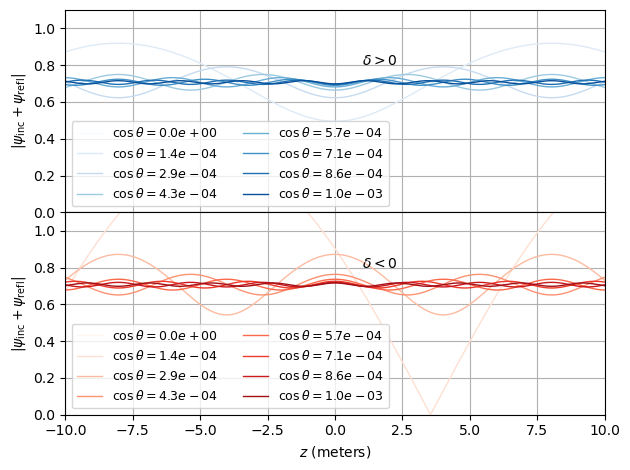

In [8]:
fig = plt.figure()
# Eventually we want to set rcparams here to use LaTeX fonts.

ax_1 = fig.add_subplot(211)
ax_2 = fig.add_subplot(212)
Npoints = 8
for i, ctheta in enumerate(np.linspace(0, 1e-3, Npoints)):
    z = np.linspace(-10, 10, 1000)
    z_eV = cnub.tools.m_to_eVinv(z)
    
    abs_inc_plus_reflected = np.abs(cnub.tools.psi_incident(x=0, z=z_eV, ctheta = ctheta) + cnub.tools.psi_reflected(x=0, z=z_eV, ctheta = ctheta, delta=2.5e-8))
    ax_1.plot(z, abs_inc_plus_reflected, label=fr"$\cos\theta = {ctheta:.1e}$", color = cm.Blues(i/Npoints), lw=1)

    abs_inc_plus_reflected = np.abs(cnub.tools.psi_incident(x=0, z=z_eV, ctheta = ctheta) + cnub.tools.psi_reflected(x=0, z=z_eV, ctheta = ctheta, delta=-2.5e-8))
    ax_2.plot(z, abs_inc_plus_reflected, label=fr"$\cos\theta = {ctheta:.1e}$", color = cm.Reds(i/Npoints), lw=1)

ax_1.text(1, 0.8, r"$\delta > 0$")
ax_2.text(1, 0.8, r"$\delta < 0$")

for ax in [ax_1, ax_2]:
    ax.grid(True)
    ax.legend(loc='best', ncol=2, fontsize=9)
    ax.set_ylabel(r'$|\psi_{\rm inc}+\psi_{\rm refl}|$')
    ax.set_xlabel(r'$z$ (meters)')
    ax.set_ylim(0,1.1)
    ax.set_xlim(z.min(), z.max())
ax_1.set_xticklabels([])

fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/psi_inc_plus_reflected_in_z.pdf", dpi=400)

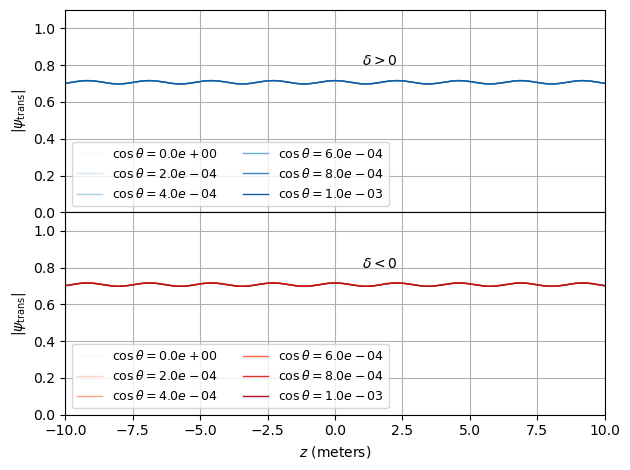

In [9]:
fig = plt.figure()
# Eventually we want to set rcparams here to use LaTeX fonts.

ax_1 = fig.add_subplot(211)
ax_2 = fig.add_subplot(212)
Npoints = 6
for i, ctheta in enumerate(np.linspace(0, 1e-3, Npoints)):
    z = np.linspace(-10, 10, 1000)
    z_eV = cnub.tools.m_to_eVinv(z)
    
    abs_trans = np.abs(cnub.tools.psi_transmitted(x=0, z=z_eV, ctheta = ctheta, delta=2.5e-8))
    ax_1.plot(z, abs_inc_plus_reflected, label=fr"$\cos\theta = {ctheta:.1e}$", color = cm.Blues(i/Npoints), lw=1)

    abs_trans = np.abs(cnub.tools.psi_transmitted(x=0, z=z_eV, ctheta = ctheta, delta=-2.5e-8))
    ax_2.plot(z, abs_inc_plus_reflected, label=fr"$\cos\theta = {ctheta:.1e}$", color = cm.Reds(i/Npoints), lw=1)

ax_1.text(1, 0.8, r"$\delta > 0$")
ax_2.text(1, 0.8, r"$\delta < 0$")

for ax in [ax_1, ax_2]:
    ax.grid(True)
    ax.legend(loc='best', ncol=2, fontsize=9)
    ax.set_ylabel(r'$|\psi_{\rm trans}|$')
    ax.set_xlabel(r'$z$ (meters)')
    ax.set_ylim(0,1.1)
    ax.set_xlim(z.min(), z.max())
ax_1.set_xticklabels([])

fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/psi_trans_in_z.pdf", dpi=400)

## Reproduciong the medium side (transmitted wave)

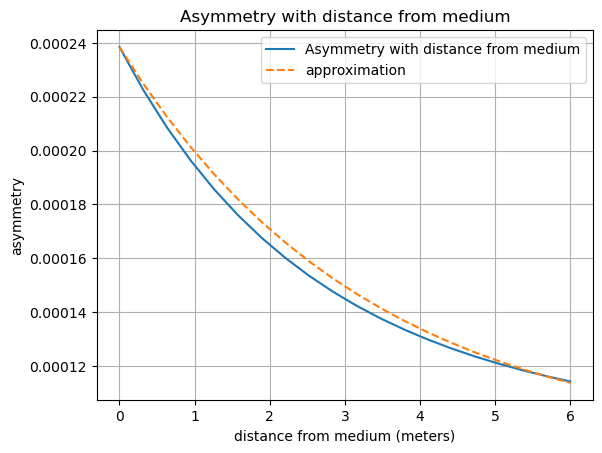

In [10]:
# Generate z values from -3.33E-8 to 0
z_vals = np.linspace(0, 6, 20)

# Calculate y values using your function
integral_values = [cnub.tools.integral_fxn_2(z) for z in z_vals]

plt.plot(z_vals, integral_values, label="Asymmetry with distance from medium")
plt.plot(z_vals, cnub.tools.analytical_approximation(z_vals), ls='--', label='approximation')


plt.xlabel("distance from medium (meters)")
plt.ylabel("asymmetry")
plt.title("Asymmetry with distance from medium")
plt.grid(True)
plt.legend()
# Show the plot (or save it to a file)
fig.savefig("plots/asymmetry_in_vacuum.pdf", dpi=400)

## Reproducing the vacuum side (inc + reflected)

ERROR? Not sure what is going on with the vacuum side here -- needs some work

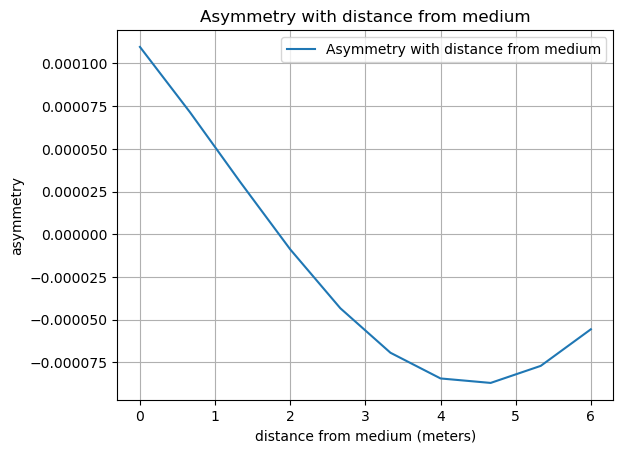

In [11]:
# Generate z values from -3.33E-8 to 0
z_vals = np.linspace(0, 6, 10)

# Calculate y values using your function
integral_values = [cnub.tools.integral_fxn_1(z) for z in z_vals]

# Create the plot
plt.plot(z_vals, integral_values, label="Asymmetry with distance from medium")
plt.xlabel("distance from medium (meters)")
plt.ylabel("asymmetry")
plt.title("Asymmetry with distance from medium")
plt.grid(True)
plt.legend()

# Show the plot (or save it to a file)
fig.savefig("plots/asymmetry_in_medium.pdf", dpi=400)